In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import math
from cityScraper import transformDataFrame
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8, 5.5)

In [14]:
#read and transform dataset
df = pd.read_csv('data/SF_data_private_2.csv',delimiter=';');
df = transformDataFrame(df)

In [15]:
#Number of training samples
M_train = int(len(df.index)*0.75)

#Randomly sample training set.
train_rows = np.random.choice(df.index.values,M_train)
df_train = df.ix[train_rows]
df_test = df.drop(train_rows)

print('M_train = %i, M_test = %i' % (M_train,len(df.index)-M_train))

M_train = 1313, M_test = 438


In [16]:
featureList = sorted(list(df.drop(['price','room_type','bed_type'],1)))
X = np.array(df_train[featureList])
Y = np.array(df_train['price'].astype('float'))
forest=RandomForestRegressor(n_estimators=50)
forest.fit(df_train[featureList],df_train['price'])
df['pred_price']=forest.predict(df[featureList])

In [12]:
# importances = forest.feature_importances_
# std = np.std([tree.feature_importances_ for tree in forest.estimators_],
#              axis=0)
# indices = np.argsort(importances)[::-1]

# # Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# # Plot the feature importances of the forest
# plt.figure()
# plt.title("Feature importances")
# plt.bar(range(X.shape[1]), importances[indices],
#        color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), [featureList[i] for i in indices],rotation=90)
# plt.xlim([-1, X.shape[1]])
# plt.show()

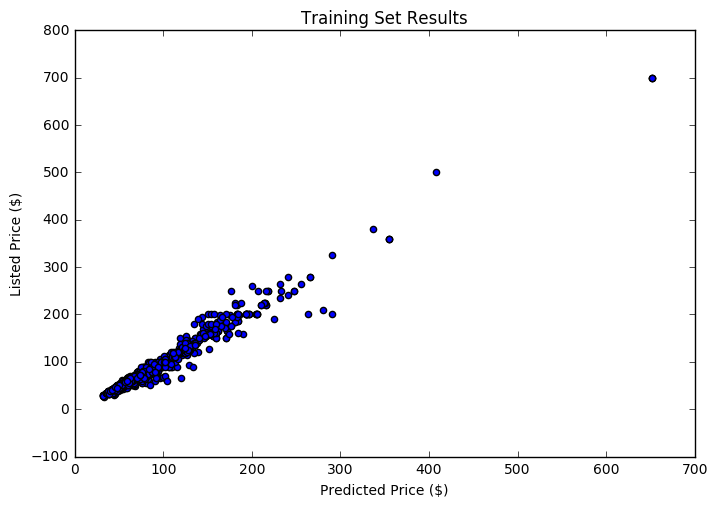

In [17]:
plt.scatter(df.ix[train_rows]['pred_price'],df.ix[train_rows]['price'])
plt.title('Training Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

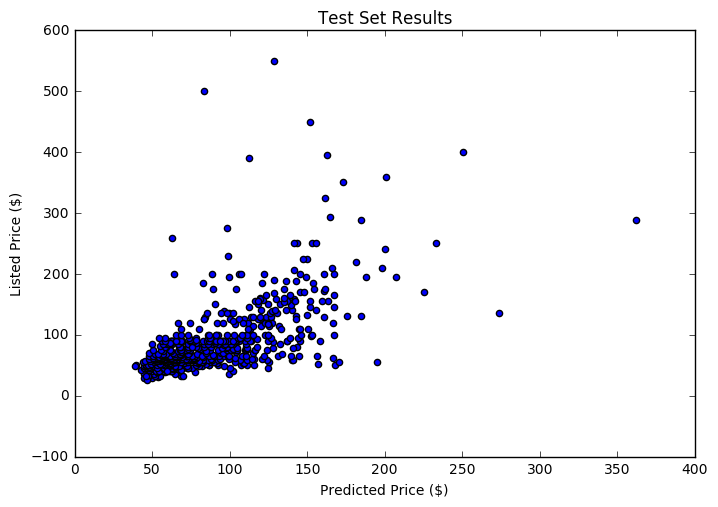

In [18]:
pred = forest.predict(df.drop(train_rows)[featureList])
plt.scatter(pred,df_test['price'])
plt.title('Test Set Results')
plt.xlabel('Predicted Price ($)')
plt.ylabel('Listed Price ($)');

In [19]:
## Python packages - you may have to pip install sqlalchemy, sqlalchemy_utils, and psycopg2.
from sqlalchemy import create_engine
from sqlalchemy_utils import database_exists, create_database
import psycopg2

In [16]:
dbname = 'airbnb_db'
username = 'brian'
pswd = ''
engine = create_engine('postgresql://%s:%s@localhost/%s'%(username,pswd,dbname))
print('postgresql://%s:%s@localhost/%s'%(username,pswd,dbname))
print(engine.url)

postgresql://brian:@localhost/airbnb_db
postgresql://brian:@localhost/airbnb_db


In [17]:
df.to_sql('city_table', engine, if_exists='replace')

In [18]:
con = None
con = psycopg2.connect(database = dbname, user = username, host='localhost', password=pswd)
# query:
sql_query = 'SELECT * from city_table;'

airbnb_data_from_sql = pd.read_sql_query(sql_query,con)

In [20]:
from sklearn.externals import joblib

In [21]:
joblib.dump(forest,'static/forest_v1.pkl',compress=1)

['static/forest_v1.pkl']

In [9]:
forest2 = joblib.load('static/forest_v1.pkl')

In [10]:
forest2.predict(airbnb_data_from_sql[featureList])

NameError: name 'airbnb_data_from_sql' is not defined

In [22]:
df[['room_id','pred_price','price']]

,room_id,pred_price,price
0,16536186,47.16,38.0
1,5650515,68.32,33.0
2,4654218,41.04,39.0
3,15026204,69.70,32.0
4,11575586,50.98,40.0
6,11620,99.30,35.0
8,5976428,48.62,39.0
9,15097577,66.46,39.0
10,2126868,59.42,40.0
12,14268636,53.90,39.0
